# Lidando com dados desbalanceados 

Quando a variável que estamos tentando prever apresenta dados desbalanceados, por exemplo, estamos tentando prever se o funcionário quer ou não sair da empresa, 16% dos funcionarios responderam sim, o que representa uma pequena parte dos dados. Nesses casos, o algoritmo não tem dados suficientes para treinar essa hipótese, gerando uma acurácia semelhante a distribuição dos dados.

Para lidar com esse problema nós utilizamos o método de Oversampling e Undersampling 

##### Oversampling - são adicionadas copias de observações para repor a classe com menos ocorrência

##### Undersampling - algumas observações da classe predominante são excluídas para balancear o conjunto de dados.

Nesse tutorial focarei apenas no tratamento dos dados desbalanceados, não levando muito em conta os outros tipos de tratamentos. Vamos prestar atenção na diferença dos dados desbalanceados e balanceados

In [253]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from category_encoders.one_hot import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import preprocessing
import seaborn as sn
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [272]:
df = pd.read_csv(r'C:\Users\Usuario\Desktop\data\IBM\employe.csv')

# Sem tratamento

Primeiro vamos usar as métricas de avaliação com os dados antes do tratamento para analisar os resultados

Proporção da variável que queremos prever

In [286]:
df['Attrition'].value_counts(normalize=True)

0    0.838776
1    0.161224
Name: Attrition, dtype: float64

Aplicando um Encoder nas variáveis categóricas

In [280]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})

In [281]:
ohe = OneHotEncoder()

In [282]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
model = LogisticRegression()

In [283]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [284]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state= 1)

In [231]:
model = LogisticRegression()

model.fit(X_train, y_train)
preds = model.predict(X_test)
    
print('f1', f1_score(y_test,preds))
print()
print('accuracy_score', accuracy_score(y_test,preds))
print()
print('classification_report', classification_report(y_test,preds))
print()
print(pd.crosstab(y_test, preds, rownames=['Real'],colnames=['Predito'],margins=True))

f1 0.025316455696202535

accuracy_score 0.8253968253968254

classification_report               precision    recall  f1-score   support

           0       0.83      1.00      0.90       364
           1       0.50      0.01      0.03        77

    accuracy                           0.83       441
   macro avg       0.66      0.51      0.46       441
weighted avg       0.77      0.83      0.75       441


Predito    0  1  All
Real                
0        363  1  364
1         76  1   77
All      439  2  441


Podemos ver que o algoritmo apenas definiu que os funcionários não querem sair da empresa, a precisão dos acertos dos 16% que querem sair foi de 1%

# UNDER SAMPLING

Como dito anteriormente, esse método exclui algumas partes da classe predominante para igualar a menor predominante para balancear o conjunto de dados

In [232]:
df = pd.read_csv(r'C:\Users\Usuario\Desktop\data\IBM\employe.csv')

Faremos a mesma preparação dos dados

In [233]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df = ohe.fit_transform(df)

Importaremos a função NearMiss para fazer o trabalho do undersampling

In [234]:
from imblearn.under_sampling import NearMiss

In [235]:
nm = NearMiss()

In [236]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [237]:
X, y = nm.fit_resample(X, y)

In [238]:
import seaborn as sns

Como podemos ver, o número de funcionários que não querem sair foi reduzido até chegar a mesma quantidade dos que querem sair

<AxesSubplot:xlabel='Attrition', ylabel='count'>

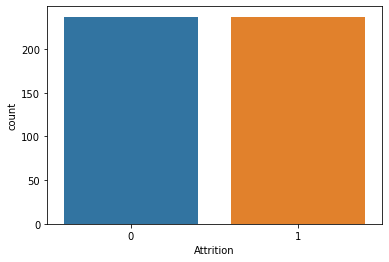

In [239]:
sns.countplot(x = y)

In [240]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state= 1, stratify=y)

In [241]:
model = LogisticRegression()

model.fit(X_train, y_train)
preds = model.predict(X_test)
    
print('f1', f1_score(y_test,preds))
print()
print('accuracy_score', accuracy_score(y_test,preds))
print()
print('classification_report', classification_report(y_test,preds))
print()
print(pd.crosstab(y_test, preds, rownames=['Real'],colnames=['Predito'],margins=True))

f1 0.619718309859155

accuracy_score 0.6223776223776224

classification_report               precision    recall  f1-score   support

           0       0.62      0.63      0.63        71
           1       0.63      0.61      0.62        72

    accuracy                           0.62       143
   macro avg       0.62      0.62      0.62       143
weighted avg       0.62      0.62      0.62       143


Predito   0   1  All
Real                
0        45  26   71
1        28  44   72
All      73  70  143


Comparando as métricas usando o undersampling podemos notar que a precisão de acerto dos funcionários que querem sair aumentou de 1% para 61%

# SMOTE overSAMPLING

Agora testaremos com o OverSampling, que ao contrário do UnderSampling, nós adicionamos dados a classe com menos dados até igualar com a predominante

In [242]:
df = pd.read_csv(r'C:\Users\Usuario\Desktop\data\IBM\employe.csv')

Faremos a mesma preparação dos dados

In [243]:
df['Attrition'] = df['Attrition'].map({'Yes':1,'No':0})
df = ohe.fit_transform(df)

In [244]:
X = df.drop('Attrition', axis=1)
y = df['Attrition']

In [245]:
np.bincount(y)

array([1233,  237], dtype=int64)

In [246]:
from imblearn.over_sampling import SMOTE

In [247]:
smt = SMOTE()

In [248]:
X, y = smt.fit_resample(X,y)

In [249]:
np.bincount(y)

array([1233, 1233], dtype=int64)

In [250]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state= 1, stratify=y)

In [251]:
model = LogisticRegression()

model.fit(X_train, y_train)
preds = model.predict(X_test)
    
print('f1', f1_score(y_test,preds))
print()
print('accuracy_score', accuracy_score(y_test,preds))
print()
print('classification_report', classification_report(y_test,preds))
print()
print(pd.crosstab(y_test, preds, rownames=['Real'],colnames=['Predito'],margins=True))

f1 0.6523489932885906

accuracy_score 0.65

classification_report               precision    recall  f1-score   support

           0       0.65      0.64      0.65       370
           1       0.65      0.66      0.65       370

    accuracy                           0.65       740
   macro avg       0.65      0.65      0.65       740
weighted avg       0.65      0.65      0.65       740


Predito    0    1  All
Real                  
0        238  132  370
1        127  243  370
All      365  375  740


Neste caso, o oversampling saiu superior ao undersampling, obtendo 65% de precisão

# Conclusão

Neste tutorial, ficou claro a importancia de tratar dados desbalanceados antes de aplicar os modelos, o resultado é completamente diferente. Nesse caso o método do oversambling saiu superior, porém nem sempre isso será verdade, a melhor prática é testar os 2 métodos.